# Chapter 3. Polarization and Mueller Calculus
See also M-Sec. 4.2. and S-Sec. 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from IPython.display import display, Math
import vispy
import polarsh as psh
from utils import math_stokes

cam2world_vispy = vispy.util.quaternion.Quaternion(np.cos(np.pi/4), -np.sin(np.pi/4), 0, 0) # +Y-up -Z-forward, in vispy camera convention
psh.set_visoptions_vispy(arrow_size=0.3, arrow_scale=0.3, title_size = 12,
                         cam2world=cam2world_vispy, figsize=(900, 300)) 

## 3.1. Stokes parameters, measurement frames, and Stokes vectors
While intensity of unpolarized light is simply described as a scalar (per color channel/spectrum) without considering the direction of the ray, intensity of a polarized light cannot be defined without considering the direction.

Let's fix the direction of light to be as `[0, 0, 1]`$=\hat z_g\in\hat{\mathbb{S}}^2$, as same as the global (world) $z$ axis. To describe polarized intensity of a ray with direction $\hat z_g$, we first need to assign a *measurement frame* (= reference frame, local frame) $\vec{\mathbf F}$, which has the ray direction as its local $z$ axis (`F[:,2]` is the ray direction below). It can be described by the `psh.SphereFrameField` class. While it will be explained in more detail in [Chapter 4. Stokes Vector Fields](./4_Stokes_vector_fields.ipynb), here simply use that calling `psh.SphereFrameField(sphG, F)` with an `psh.SphereGrid` instance with a single point and a `np.ndarray` instance `F` with the shape `(3, 3)` constructs an instance.

With the frame $\vec{\mathbf F}$ and four *Stokes parameters* $s_0$, $s_1$, $s_2$, and $s_3$, we can characterize a *Stokes vector* $\overset{\leftrightarrow}s$. In the `polarsh` package, `psh.StokesField(sphFF, Stk)` can represent a Stokes vector where `sphFF: psh.SphereFrameField` is a measurement frame and `Stk: np.ndarray[..., 4]` is the Stokes parameters (Stokes component vector).

> **Note**
> Taking all the four Stokes parameters into account, the most accurate visualization would be using ellipses. However, ellipse visualization has not been implemented currently. However, double-sided arrow visualization is enough to understand the frame dependency of Stokes vectors.


Stokes parameters: [1, 1, 0, 0]


RFBOutputContext()

[Keyboard interface]
A: hide/show global axes
G: hide/show sphere grids
F: show x(, y(, z)) axes for the frame field
[Keyboard interface]
A: hide/show global axes


CanvasBackend(css_width='900px')
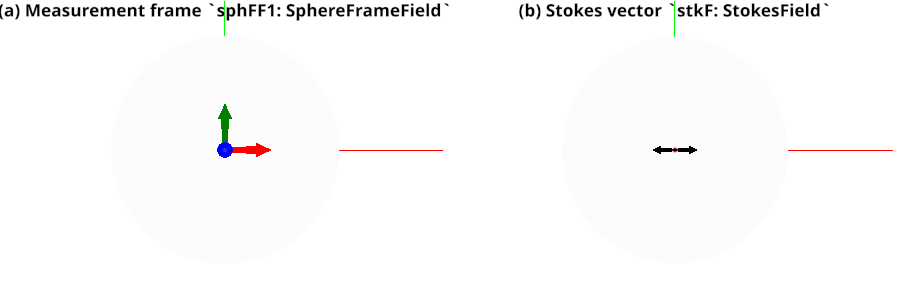

In [2]:
sphG = psh.SphereGrid(psh.DomType.UNI, psh.AngType.RAD, 0, 0) # (θ, φ)=(0, 0), i.e., [0, 0, 1] in Cartesian
F1 = np.eye(3)
sphFF1 = psh.SphereFrameField(sphG, F1)

Stk1 = [1, 1, 0, 0] # (numeric) Stokes component vector
print(f"Stokes parameters: {Stk1}")
stkF1 = psh.StokesField(sphFF1, Stk1) # (geometric) Stokes vector
with psh.visualize_layout(1, 2):
    sphFF1.visualize(title=f"(a) Measurement frame `sphFF1: {type(sphFF1).__name__}`")
    stkF1.visualize(title=f"(b) Stokes vector `stkF: {type(stkF1).__name__}`")

We distinguish Stokes vectors and Stokes parameters (considering the parameters as a single numeric vector $\mathbf s \coloneqq\left[s_0, s_1, s_2, s_3\right]^T$, we call it a *Stokes component vector*) as *geometric* and *numeric* quantities. Geometric Stokes vectors can be understood as double-sided arrow visualized by `psh.StokesField.visualize()`, and numeric Stokes component vectors. Using a different famre (`sphFF2` below) the Stokes component vector changes but we say that the original geometric quantity (Stokes vector, `stkF`) does not change.

Note that we denote the relationship between the geometric Stokes vectors and numeric Stokes component vectors as:
$$\tag{M-15, 16}
\overset{\leftrightarrow}{s} = \left[\mathbf{s}\right]_{\vec{\mathbf F}}, \quad \mathbf{s} = \left[\overset{\leftrightarrow}{s}\right]^{\vec{\mathbf F}}
$$

`psh.StokesField.to_SphFF(sphFF: psh.SphereFrameField) -> psh.StokesField` changes its internal representation under different frame, but the object itself will be treated as the identical one.

Stokes parameters: [ 1.0000000e+00 -1.0000000e+00 -1.2246468e-16  0.0000000e+00]


RFBOutputContext()

[Keyboard interface]
A: hide/show global axes
G: hide/show sphere grids
F: show x(, y(, z)) axes for the frame field
[Keyboard interface]
A: hide/show global axes


CanvasBackend(css_width='900px')
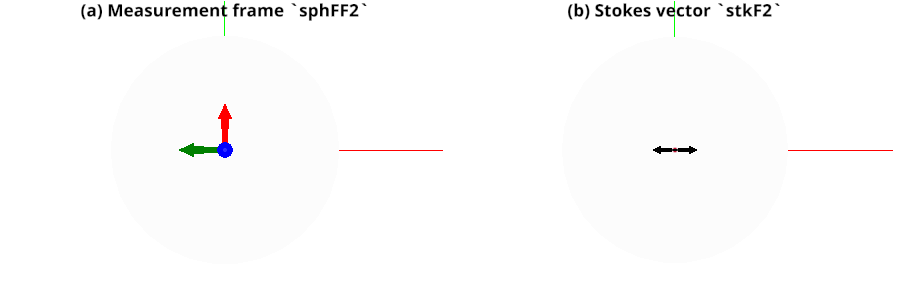

In [3]:
F2 = np.eye(3) @ psh.rotz(np.pi/2)
sphFF2 = psh.SphereFrameField(sphG, F2)
stkF2 = stkF1.to_SphFF(sphFF2)
Stk2 = stkF2.Stk

print(f"Stokes parameters: {Stk2}")
with psh.visualize_layout(1, 2):
    sphFF2.visualize(title=f"(a) Measurement frame `sphFF2`")
    stkF2.visualize(title=f"(b) Stokes vector `stkF2`")

Observe that the frame (`sphFF1` and `sphFF2`) rotated by $\frac\pi2$ around the $z$ axis but the `psh.StokesField` objects are identically visualized. However, their (numeric) Stokes component vector were changed from $\left[1, 1, 0, 0\right]$ to $\left[1, -1, 0, 0\right]$ due to the coordinate conversion property of Stokes vectors.

For $\vec{\mathbf F}_2 = \vec{\mathbf F}_1 \mathbf R_{z}\left(\vartheta\right)$ (here, $\vec{\mathbf F}_i=$`sphFFi` and $\vartheta=\frac\pi2$), denotes (numeric) Stokes component vectors of a (geometric) Stokes vector $\overset{\leftrightarrow}s$ with respect to $\vec{\mathbf F}_1$ ($\vec{\mathbf F}_2$, resp.) by $\mathbf s_1$ ($\mathbf s_2$, resp.). Then these two Stokes component vectors satisfy:
$$\tag{M-14, S-83}
\mathbf s_2 = \begin{bmatrix}
    1&0&0&0 \\
    0&\cos 2\vartheta & \sin2\vartheta &0 \\
    0&-\sin2\vartheta & \cos2\vartheta & 0 \\
    0&0&0&1
\end{bmatrix}\mathbf s_1.
$$
`psh.StokesField.to_SphFF()` performs this conversion internally.

In [4]:
assert stkF1.allclose(stkF2)
display(Math(r"%s_1 = \left[\mathbf{s}_1\right]_{\vec{\mathbf F}_1} = %s_2 = \left[\mathbf{s}_2\right]_{\vec{\mathbf F}_2}" % ((math_stokes("s"),)*2)))

<IPython.core.display.Math object>

## 3.2. Operations on Stokes vectors
Several operations on Stokes vectors are well defined. Defining addition, scalar multiplication, and inner products using ones of Stokes component vectors under a fixed measurement frame, the resulting Stokes vectors (addition, scalar multiplication) and scalar values (inner product) do not dependent on choice of measurement frames

# Inner products:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

RFBOutputContext()

CanvasBackend(css_height='600px', css_width='600px')
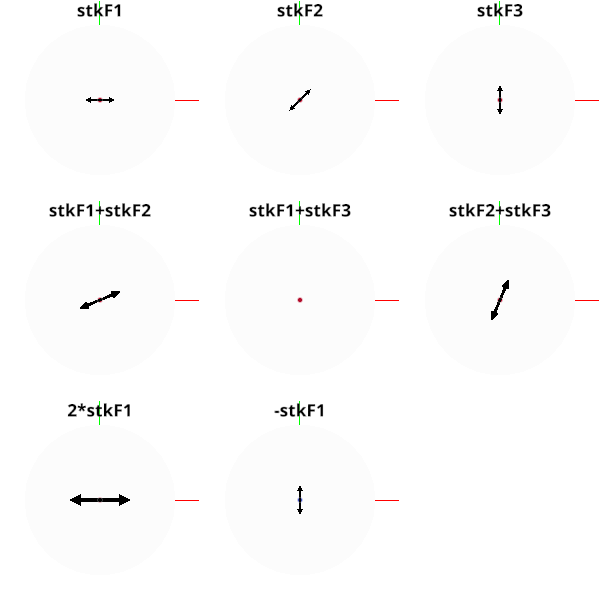

In [5]:
stkF1 = psh.StokesField(sphFF1, [1, 1, 0, 0])
stkF2 = psh.StokesField(sphFF1, [1, 0, 1, 0])
stkF3 = psh.StokesField(sphFF1, [1, -1, 0, 0])
stkF_list = [stkF1, stkF2, stkF3]

stkF_add12 = stkF1 + stkF2
stkF_add13 = stkF1 + stkF3
stkF_add23 = stkF2 + stkF3
stkF_mul1 = stkF1 * 2
stkF_neg1 = stkF1 * -1

print("# Inner products:")
def inner(stkFi: psh.StokesField, stkFj: psh.StokesField) -> float:
    # `stkF.wrt_SphFF(sphFF)` is a shorthand of `stkF.to_SphFF(sphFF).Stk`
    return (stkFi.Stk * stkFj.wrt_SphFF(stkFi.SphFF)).sum()

for i, stkFi in enumerate(stkF_list):
    for j, stkFj in enumerate(stkF_list[i+1:]):
        mathtxt_format = r"\left\langle {\overset \leftrightarrow s}_%d, {\overset \leftrightarrow s}_%d\right\rangle_{\mathcal S}=%f"
        display(Math(mathtxt_format % (i+1,i+j+2, inner(stkFi, stkFj))))

with psh.visualize_layout(3, 3, figsize=(600, 600)):
    stkF1.visualize(title="stkF1", help=False)
    stkF2.visualize(title="stkF2", help=False)
    stkF3.visualize(title="stkF3", help=False)

    stkF_add12.visualize(title="stkF1+stkF2", help=False)
    stkF_add13.visualize(title="stkF1+stkF3", help=False)
    stkF_add23.visualize(title="stkF2+stkF3", help=False)

    stkF_mul1.visualize(title="2*stkF1", help=False)
    stkF_neg1.visualize(title="-stkF1", help=False)
    psh.visualize_layout.skip()

In [6]:
# Check well-definedness!
sphFF2 = psh.SphereFrameField(sphG, psh.rotz(np.pi/2))
sphFF3 = psh.SphereFrameField(sphG, psh.rotz(-np.pi/2))
sphFF4 = psh.SphereFrameField(sphG, psh.rotz(np.pi/4))
sphFF_list = [sphFF2, sphFF3, sphFF4]
for sphFFi in sphFF_list:
    # stkF1.allclose(stkF2) == np.allclose(stkF1.Stk, stkF2.wrt_SphFF(stkF1.SphFF))
    assert stkF1.allclose(stkF1.to_SphFF(sphFFi)) # Different numeric representation, but identical geometric quantity!

    stkF_mul1_alt = stkF1.to_SphFF(sphFFi) * 2
    
    assert stkF_mul1.allclose(stkF_mul1_alt)

    for sphFFj in sphFF_list:
        stkF_add12_alt = stkF1.to_SphFF(sphFFi) + stkF2.to_SphFF(sphFFj)
        assert stkF_add12.allclose(stkF_add12_alt)
        inner_alt = inner(stkF1.to_SphFF(sphFFi), stkF2.to_SphFF(sphFFj))
        assert np.allclose(inner(stkF1, stkF2), inner_alt)
print("Clear!")

Clear!


Rotation of a Stokes vector $\overset{\leftrightarrow}s\in \mathcal{S}_{\hat \omega}$ by a rotaion transform $\vec R\in \overrightarrow{SO}\left(3\right)$ is defined as:
$$\tag{M-19}
\vec R_{\mathcal S}\overset{\leftrightarrow}s \coloneqq \left[\left[\overset{\leftrightarrow}s\right]^{\vec{\mathbf F}}\right]_{\vec{\mathbf F}} \in \mathcal{S}_{\vec R\hat \omega}.
$$

RFBOutputContext()

CanvasBackend(css_height='500px', css_width='750px')
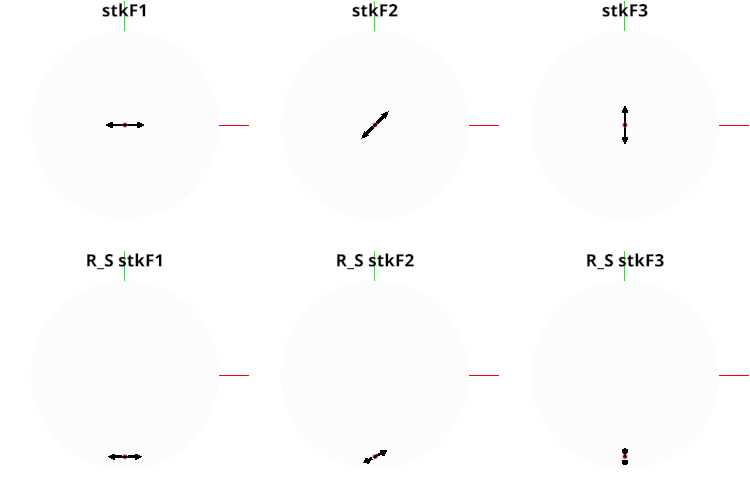

In [7]:
stkF_list = [stkF1, stkF2, stkF3]
rotvec = [np.pi/4, 0, 0]
stkF_rot_list = [stkF.apply_rotation(rotvec) for stkF in stkF_list]

with psh.visualize_layout(2, 3, figsize=(750, 500)):
    for i,stkF in enumerate(stkF_list):
        stkF.visualize(title=f"stkF{i+1}", help=False)

    for i,stkF in enumerate(stkF_rot_list):
        stkF.visualize(title=f"R_S stkF{i+1}", help=False)

Note that the resulting Stokes vector is contained in a different Stokes space $\mathcal{S}_{\vec R\hat \omega}$ from the original one whenever $\vec R\ne \vec R_{\hat \omega}\left(\vartheta\right)$. Thus, several operations including addition and inner product between $\overset{\leftrightarrow}s$ and $\vec R_{\mathcal S}\overset{\leftrightarrow}s$ will not be defined in general.

In [8]:
for stkF, stkF_rot in zip(stkF_list, stkF_rot_list):
    try:
        stkF + stkF_rot
    except:
        print("Error!")
    try:
        inner(stkF, stkF_rot)
    except:
        print("Error!")

Error!
Error!
Error!
Error!
Error!
Error!


## 3.3. Full vs. spin-2 Stokes vectors
For some context, considering only partial components in Stokes parameters will be useful. In `polarsh`, which Stokes parameters given object covers is usually stored as an attibute of `psh.CodType` instance. The class `psh.CodType` is name after *codomain type*, and is a subclass of `EnumInt`.

`psh.CodType`
* `psh.CodType.SCALAR`: $s_0$ (`ScalarField`)
* `psh.CodType.POLAR2`: $s_1$, $s_2$ (`StokesField`) *spin-2 Stokes vectors*
* `psh.CodType.POLAR3`: $s_0$, $s_1$, $s_2$ (`StokesField`)
* `psh.CodType.POLAR4`: $s_0$, $s_1$, $s_2$, $s_3$ (`StokesField`) *(full) Stokes vectors*
<!-- ![](./tutorial_figure/CodType.png) -->
<img src="./tutorial_figure/CodType.png" style="width:800px">

The main challenge of Stokes vectors in terms of spherical domain and frame dependency comes from $s_1$ and $s_2$ components. We call Stokes vectors without $s_0$ and $s_3$ components *spin-2 Stokes vectors*.

In [9]:
print(stkF1)
print(f"{stkF1.cod_type = }, (full) Stokes vector")
print(f"{stkF1.Stk = }\n")

stkF1s2 = stkF1.to_CodType(psh.CodType.POLAR2) # `stkF.to_CodType("POLAR2")`, in a shorthand
print(stkF1s2)
print(f"{stkF1s2.cod_type = }, spin-2 Stokes vector")
print(f"{stkF1s2.Stk = }\n")

StokesField[
  dom_type = <DomType.UNI: 0>,
  Stk.shape = [g: | c: | p:4],
]
stkF1.cod_type = <CodType.POLAR4: 4>, (full) Stokes vector
stkF1.Stk = array([1, 1, 0, 0])

StokesField[
  dom_type = <DomType.UNI: 0>,
  Stk.shape = [g: | c: | p:2],
]
stkF1s2.cod_type = <CodType.POLAR2: 2>, spin-2 Stokes vector
stkF1s2.Stk = array([1, 0])



For spin-2 Stokes vectors, we can consider their $s_1$ and $s_2$ components as singles complex numbers $s_1+is_2$ is sometimes useful. It will be useful to understand basis of Stokes vector fields, which will be introduced in later chapters.

* Complex scalar multiplication:
$$\tag{M-Eq.(20), S-Def. 3.4.(1)}
z\left[s_1+is_2\right]_{\vec {\mathbf F}} = \left[z\left(s_1+is_2\right)\right]_{\vec {\mathbf F}}
$$
Particularly, $i\overset\leftrightarrow s$ is the rotated $\overset\leftrightarrow s$ by $\frac \pi 4$ around its local $z$ axis (the direction of ray).

RFBOutputContext()

CanvasBackend(css_height='600px', css_width='600px')
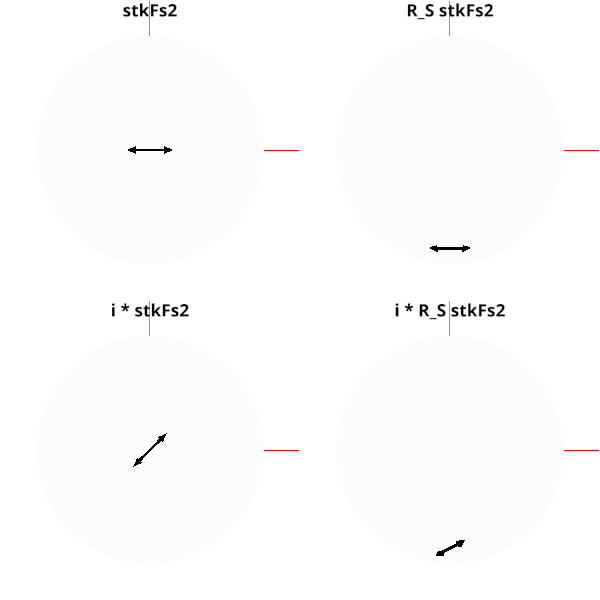

In [10]:
stkF1s2_rot = stkF1s2.apply_rotation(rotvec)

# Complex scalar multiplication
stkF1s2_i = stkF1s2 * 1j
stkF1s2_rot_i = stkF1s2_rot * 1j

with psh.visualize_layout(2, 2, figsize=(600, 600)):
    stkF1s2.visualize(title="stkFs2", help=False)
    stkF1s2_rot.visualize(title="R_S stkFs2", help=False)

    stkF1s2_i.visualize(title="i * stkFs2", help=False)
    stkF1s2_rot_i.visualize(title="i * R_S stkFs2", help=False)

* Complex inner product
$$\tag{variant of S-Def. 3.4.(2)}
{\left\langle \left[s_1+is_2\right]_{\vec {\mathbf F}}, \left[t_1+it_2\right]_{\vec {\mathbf F}}\right\rangle}_{\mathcal S | \mathbb{C}} = \left(s_1-is_2\right)\left(t_1+it_2\right)
$$

In [11]:
def inner_comp(stki: psh.StokesField, stkj: psh.StokesField) -> complex:
    # `psh.vec2comp`: 2-dim vector to complex
    return psh.vec2comp(stki.Stk).conj() * psh.vec2comp(stkj.wrt_SphFF(stki.SphFF))

stkF2s2 = stkF2.to_CodType("POLAR2")
inner_comp12 = inner_comp(stkF1s2, stkF2s2)
assert stkF1s2.SphFF is stkF2s2.SphFF
print(f"{stkF1s2.Stk=}, {stkF2s2.Stk=}, {inner_comp12=}\n")

# ---------- Well-definedness ----------
for sphFFi in sphFF_list:
    for sphFFj in sphFF_list:
        assert np.allclose(inner_comp12, inner_comp(stkF1s2.to_SphFF(sphFFi), stkF2s2.to_SphFF(sphFFj)))
print("Complex inner product between two spin-2 Stokes vectors is also well-defined!")

stkF1s2.Stk=array([1, 0]), stkF2s2.Stk=array([0, 1]), inner_comp12=1j

Complex inner product between two spin-2 Stokes vectors is also well-defined!


Some properties of complex inner products. For any $\overset\leftrightarrow s,\overset\leftrightarrow t\in\mathcal{S}_{\hat\omega}$,
$$
\begin{align}
    {\left\langle \overset\leftrightarrow s, i \overset\leftrightarrow s \right\rangle}_{\mathcal S | \mathbb{C}} &= i{\left\langle  \overset\leftrightarrow s,  \overset\leftrightarrow s \right\rangle}_{\mathcal S |\mathbb{C}} = i{\left\langle  \overset\leftrightarrow s,  \overset\leftrightarrow s \right\rangle}_{\mathcal S} ,\nonumber \\
    {\left\langle \overset\leftrightarrow s,  \overset\leftrightarrow t \right\rangle}_{\mathcal S | \mathbb{C}} &= {\left\langle  \overset\leftrightarrow t,  \overset\leftrightarrow s \right\rangle}_{\mathcal S | \mathbb{C}}^* ,\nonumber\\
    {\left\langle \overset\leftrightarrow s,  \overset\leftrightarrow t \right\rangle}_{\mathcal S | \mathbb{C}} &= {\left\langle \overset\leftrightarrow s,  \overset\leftrightarrow t \right\rangle}_{\mathcal S} + i {\left\langle i \overset\leftrightarrow s,  \overset\leftrightarrow t \right\rangle}_{\mathcal S} .\nonumber
    
\end{align}

In [12]:
stkF3s2 = stkF3.to_CodType("POLAR2")
stkFs2_list = [stkF1s2, stkF2s2, stkF3s2]
for stkFi in stkFs2_list:
    assert np.allclose(inner_comp(stkFi, stkFi * 1j), 1j*inner_comp(stkFi, stkFi))
    assert np.allclose(inner_comp(stkFi, stkFi * 1j), 1j*inner(stkFi, stkFi))

    for stkFj in stkFs2_list:
        assert np.allclose(inner_comp(stkFi, stkFj), inner_comp(stkFj, stkFi).conj())
        assert np.allclose(inner_comp(stkFi, stkFj), inner(stkFi, stkFj) + 1j*inner(stkFi*1j, stkFj))
print("Clear!")

Clear!
